In [1]:
from ramCOH.signal_processing import functions as f
import ramCOH.raman as ram
from ramCOH.signal_processing import curves as c
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout(colors=ps.colors.vitaminC)

In [2]:
olivine_file = "./olivine/PI065-04-01_2022_03_01_14_48_11_532nm_Edge_100�_x50_VIS_LWD_H150_1800 (450-850nm)_5s x 2_01.txt"
x, y = np.genfromtxt(olivine_file, unpack=True)

In [3]:
olivine = ram.olivine(x, y)
olivine.baselineCorrect()
olivine.calculate_noise()
olivine.noise

9.960059247496433

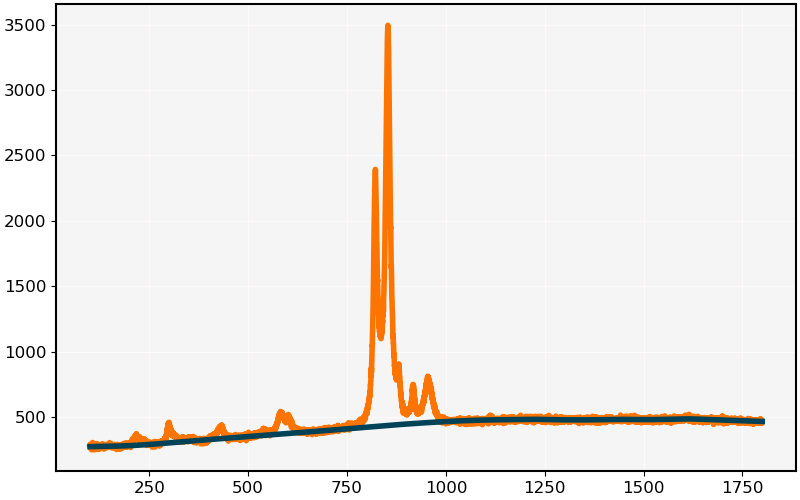

In [4]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.plot(x, olivine.baseline)

# plt.plot(olivine.x, olivine.intensities["BC"])

plt.show()

In [5]:
olivine.deconvolve(noise_threshold=0.5, min_amplitude=1)

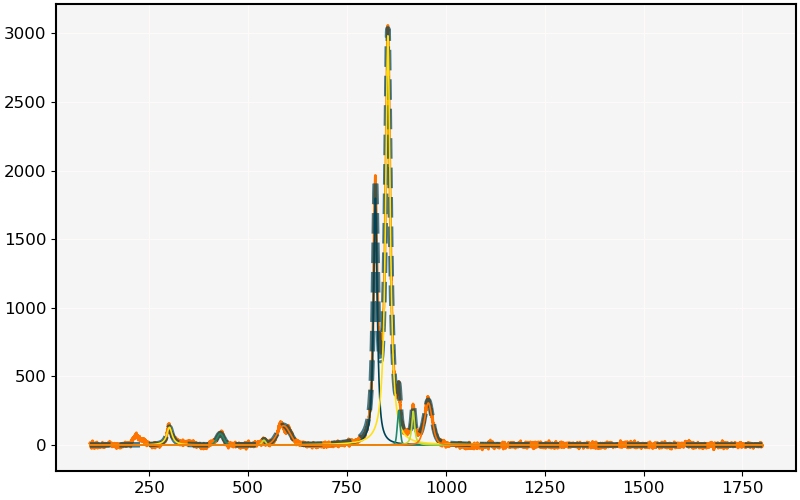

In [6]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
plt.plot(olivine.x, c.sum_GaussLorentz(olivine.x, *olivine.deconvolution_parameters), alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in olivine.deconvoluted_peaks:
    plt.plot(olivine.x, c.GaussLorentz(olivine.x, **curve), linewidth=1.2)
# plt.plot(xtrim, f.sum_GaussLorentz(xtrim, *params), linewidth=1)

In [7]:
olivine.deconvolution_parameters

[array([300.93602908, 429.42691063, 539.66793452, 589.70869875,
        821.77776113, 853.37686926, 880.74323104, 917.36019012,
        955.60603306]),
 array([ 129.77765308,   81.83129902,   35.35731508,  140.94486883,
        1799.62344593, 2982.95329941,  249.57652917,  246.04404307,
         306.70762451]),
 array([ 8.05045857,  8.63544988,  4.77656211, 15.9947045 ,  5.42714059,
         6.92321872,  3.65632276,  4.16810225, 10.24272391]),
 array([1.00000000e+00, 1.84262586e-02, 7.37696965e-02, 3.44980058e-25,
        8.99029899e-01, 1.00000000e+00, 2.64674864e-01, 1.00000000e+00,
        3.62994018e-01]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [8]:
2e-6 * 6e3

0.012